# A+Bj--> A,B 

In [1]:
%cd /Users/user/Desktop/IWF-DNN/data2DComplex
%pwd
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import scipy.io as sio
import time
from sklearn.cross_validation import train_test_split
%matplotlib inline

/Users/user/Desktop/IWF-DNN/data2DComplex


/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [296]:
DateLocation='MIMOComplex50000_3.mat'
Data = sio.loadmat(DateLocation)#load data
Xdata=Data['XX']
Ydata=Data['YY']
# trainData = np.reshape(XXData,[12 ,50000 ])#reshape to 2d array
Xdata = np.transpose(Xdata)
Ydata = np.transpose(Ydata)
x_train, x_val ,y_train, y_val= train_test_split(Xdata, Ydata, test_size=0.3)

# with Dropout 

In [59]:
# Functions for deep neural network weights initialization
def ini_weights(n_input, n_hidden_1, n_hidden_2, n_hidden_3, n_output):
    weights = {
        'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1]) / np.sqrt(n_input)),
        'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2]) / np.sqrt(n_hidden_1)),
        'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3]) / np.sqrt(n_hidden_2)),
        'out': tf.Variable(tf.truncated_normal([n_hidden_3, n_output])) / n_hidden_3,
    }
    biases = {
        'b1': tf.Variable(tf.ones([n_hidden_1]) * 0.1),
        'b2': tf.Variable(tf.ones([n_hidden_2]) * 0.1),
        'b3': tf.Variable(tf.ones([n_hidden_3]) * 0.1),
        'out': tf.Variable(tf.ones([n_output]) * 0.1),
    }
    return weights, biases

# Functions for deep neural network structure construction
def multilayer_perceptron(x, weights, biases,input_keep_prob,hidden_keep_prob):
    x = tf.nn.dropout(x, input_keep_prob)                         # dropout layer
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])   # x = wx+b
    layer_1 = tf.nn.relu(layer_1)                                 # x = max(0, x)
    layer_1 = tf.nn.dropout(layer_1, hidden_keep_prob)            # dropout layer

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_2 = tf.nn.dropout(layer_2, hidden_keep_prob)

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    layer_3 = tf.nn.dropout(layer_3, hidden_keep_prob)

    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
#     out_layer = tf.nn.relu6(out_layer) / 6
    return out_layer


# without Dropout

In [ ]:
np.real(x)
np.imag(x)

In [317]:
# Functions for deep neural network weights initialization
def ini_weights(n_input, n_hidden_1, n_hidden_2, n_hidden_3, n_output):
    weights = {
        'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1]) / np.sqrt(n_input)),
        'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2]) / np.sqrt(n_hidden_1)),
        'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3]) / np.sqrt(n_hidden_2)),
        'out': tf.Variable(tf.truncated_normal([n_hidden_3, n_output])) / n_hidden_3,
    }
    biases = {
        'b1': tf.Variable(tf.ones([n_hidden_1]) * 0.1),
        'b2': tf.Variable(tf.ones([n_hidden_2]) * 0.1),
        'b3': tf.Variable(tf.ones([n_hidden_3]) * 0.1),
        'out': tf.Variable(tf.ones([n_output]) * 0.1),
    }
    return weights, biases

# Functions for deep neural network structure construction
def multilayer_perceptron(x, weights, biases,input_keep_prob,hidden_keep_prob):
    x = tf.nn.dropout(x, input_keep_prob)                         # dropout layer
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])   # x = wx+b
    layer_1 = tf.nn.relu(layer_1)                                 # x = max(0, x)
#     layer_1 = tf.nn.dropout(layer_1, hidden_keep_prob)            # dropout layer

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
#     layer_2 = tf.nn.dropout(layer_2, hidden_keep_prob)

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
#     layer_3 = tf.nn.dropout(layer_3, hidden_keep_prob)

    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
#     out_layer = tf.nn.relu6(out_layer) / 6
    return out_layer


In [6]:
x_train.shape

(35000, 24)

In [7]:
x_val.shape

(15000, 24)

In [327]:
def train(X_train, X_val, Y_train, Y_val ,location, training_epochs=300, batch_size=1000, LR= 0.001, n_hidden_1 = 200,n_hidden_2 = 80,n_hidden_3 = 80, traintestsplit = 0.01, LRdecay=0):
    num_total = X_train.shape[0] +X_val.shape[0]                       # number of total samples
    num_val =X_val.shape[0]# number of validation samples
    num_train = X_train.shape[0] # number of training samples
    n_input = X_train.shape[1]                          # input size
    n_output = Y_train.shape[1]                         # output size
#     X_train = np.transpose(X[:, 0:num_train])     # training data
#     Y_train = np.transpose(Y[:, 0:num_train])     # training label
#     X_val = np.transpose(X[:, num_train:num_total]) # validation data
#     Y_val = np.transpose(Y[:, num_train:num_total]) # validation label

    x = tf.placeholder("float", [None, n_input])
    y = tf.placeholder("float", [None, n_output])
    is_train = tf.placeholder("bool")
    learning_rate = tf.placeholder(tf.float32, shape=[])
    total_batch = int(num_total / batch_size)
    print('train: %d ' % num_train, 'validation: %d ' % num_val)

    input_keep_prob = tf.placeholder(tf.float32)
    hidden_keep_prob = tf.placeholder(tf.float32)
    weights, biases = ini_weights(n_input, n_hidden_1, n_hidden_2, n_hidden_3, n_output)
    pred = multilayer_perceptron(x, weights, biases, input_keep_prob, hidden_keep_prob)
    cost = tf.reduce_mean(tf.square(pred - y))    # cost function: MSE
    optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost)
#     optimizer = tf.train.RMSPropOptimizer(learning_rate, 0.9).minimize(cost) # training algorithms: RMSprop
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    MSETime=np.zeros((training_epochs,3))
    with tf.Session() as sess:
        sess.run(init)
        start_time = time.time()
        for epoch in range(training_epochs):
            for i in range(total_batch):
                idx = np.random.randint(num_train,size=batch_size)
                if LRdecay==1:
                    _, c = sess.run([optimizer, cost], feed_dict={x: X_train[idx, :], y: Y_train[idx, :],
                                                                  input_keep_prob: 1, hidden_keep_prob: 1,
                                                                  learning_rate: LR/(epoch+1), is_train: True})
                elif LRdecay==0:
                    _, c = sess.run([optimizer, cost], feed_dict={x: X_train[idx, :], y: Y_train[idx, :],
                                                                      input_keep_prob: 1, hidden_keep_prob: 1,
                                                                      learning_rate: LR, is_train: True})
            MSETime[epoch, 0]= c # train cost 
            MSETime[epoch, 1]= sess.run(cost, feed_dict={x: X_val, y: Y_val, input_keep_prob: 1, hidden_keep_prob: 1, is_train: False})
            MSETime[epoch, 2]= time.time() - start_time
            if epoch%(int(training_epochs/10))==0:
                print('epoch:%d, '%epoch, 'train:%0.2f%%, '%(c*100), 'validation:%0.2f%%.'%(MSETime[epoch, 1]*100))

        print("training time: %0.2f s" % (time.time() - start_time))
        sio.savemat('MSETimeLastLayer_%d_%d_%d' % (n_output, batch_size, LR*10000) , {'train': MSETime[:,0], 'validation': MSETime[:,1], 'time': MSETime[:,2]})
        saver.save(sess, location)
    return 0

In [167]:
xtest.shape

(1000, 12)

# Different Learning Rate

In [328]:
# 3 layers (output layer without relu) , no dropout layers ADMA optimizer LR: 0.001
model_location = "./DNN/model_demo.ckpt"
train(x_train,x_val, y_train,y_val, model_location, training_epochs=200,LR=0.001, batch_size=200)
train = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 2))['train']
time = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 2))['time']
val = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 2))['validation']
plt.figure(0)
plt.plot(time.T, val.T,label='validation')
plt.plot(time.T, train.T,label='train')
plt.legend(loc='upper right')
plt.xlabel('time (seconds)')
plt.ylabel('Mean Square Error')
plt.savefig('MSE_train.eps', format='eps', dpi=1000)
plt.show()

train: 35000  validation: 15000 
epoch:0,  train:131.11%,  validation:130.47%.
epoch:20,  train:41.26%,  validation:42.78%.
epoch:40,  train:28.77%,  validation:35.20%.
epoch:60,  train:21.87%,  validation:31.75%.
epoch:80,  train:20.32%,  validation:30.23%.
epoch:100,  train:20.89%,  validation:29.39%.
epoch:120,  train:18.06%,  validation:28.93%.
epoch:140,  train:18.52%,  validation:28.30%.
epoch:160,  train:14.23%,  validation:28.00%.
epoch:180,  train:13.55%,  validation:27.95%.
training time: 179.13 s


FileNotFoundError: [Errno 2] No such file or directory: 'MSETimeLastLayer_24_200_2.mat'

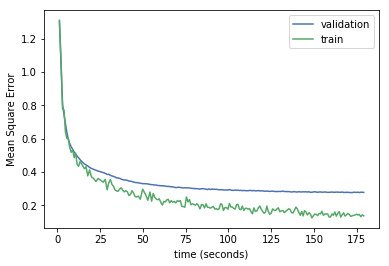

In [332]:
train = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 10))['train']
time = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 10))['time']
val = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 10))['validation']
plt.figure(0)
plt.plot(time.T, val.T,label='validation')
plt.plot(time.T, train.T,label='train')
plt.legend(loc='upper right')
plt.xlabel('time (seconds)')
plt.ylabel('Mean Square Error')
plt.savefig('MSE_train.eps', format='eps', dpi=1000)
plt.show()

train: 35000  validation: 15000 
epoch:0,  train:131.64%,  validation:130.97%.
epoch:20,  train:40.77%,  validation:44.70%.
epoch:40,  train:25.73%,  validation:34.78%.
epoch:60,  train:23.88%,  validation:31.59%.
epoch:80,  train:20.42%,  validation:30.05%.
epoch:100,  train:18.16%,  validation:29.41%.
epoch:120,  train:14.68%,  validation:29.20%.
epoch:140,  train:13.81%,  validation:29.17%.
epoch:160,  train:14.30%,  validation:28.92%.
epoch:180,  train:12.36%,  validation:28.91%.
training time: 268.29 s


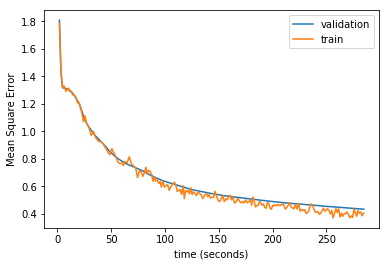

In [61]:
# 3 layers (output layer without relu) + dropout layers RMS optimizer LR: 0.001
model_location = "./DNN3/model_demo.ckpt"
train(x_train,x_val, y_train,y_val, model_location, training_epochs=200,LR=0.001, batch_size=200)
train = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 1))['train']
time = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 1))['time']
val = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 1))['validation']
plt.figure(0)
plt.plot(time.T, val.T,label='validation')
plt.plot(time.T, train.T,label='train')
plt.legend(loc='upper right')
plt.xlabel('time (seconds)')
plt.ylabel('Mean Square Error')
plt.savefig('MSE_train.eps', format='eps', dpi=1000)
plt.show()

train: 35000  validation: 15000 
epoch:0,  train:178.51%,  validation:180.80%.
epoch:20,  train:96.87%,  validation:100.78%.
epoch:40,  train:74.55%,  validation:74.01%.
epoch:60,  train:59.32%,  validation:63.61%.
epoch:80,  train:55.93%,  validation:57.25%.
epoch:100,  train:51.24%,  validation:53.40%.
epoch:120,  train:46.25%,  validation:50.67%.
epoch:140,  train:46.72%,  validation:48.32%.
epoch:160,  train:42.33%,  validation:46.45%.
epoch:180,  train:40.90%,  validation:44.74%.
training time: 284.80 s


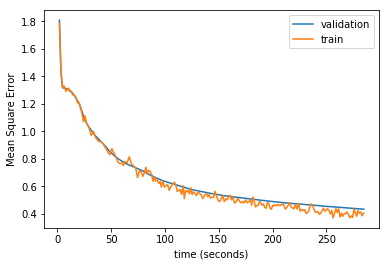

In [56]:
# 3 layers (output layer without relu) + dropout layers RMS optimizer LR: 0.0001
model_location = "./DNN2/model_demo.ckpt"
train(x_train,x_val, y_train,y_val, model_location, training_epochs=200,LR=0.0001, batch_size=200)
train = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 1))['train']
time = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 1))['time']
val = sio.loadmat('MSETimeLastLayer_%d_%d_%d'%(24, 200, 1))['validation']
plt.figure(0)
plt.plot(time.T, val.T,label='validation')
plt.plot(time.T, train.T,label='train')
plt.legend(loc='upper right')
plt.xlabel('time (seconds)')
plt.ylabel('Mean Square Error')
plt.savefig('MSE_train.eps', format='eps', dpi=1000)
plt.show()

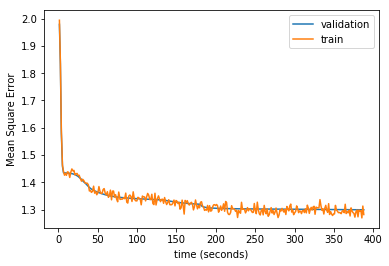

In [40]:
train = sio.loadmat('MSETime_%d_%d_%d'%(24, 200, 1))['train']
time = sio.loadmat('MSETime_%d_%d_%d'%(24, 200, 1))['time']
val = sio.loadmat('MSETime_%d_%d_%d'%(24, 200, 1))['validation']
plt.figure(0)
plt.plot(time.T, val.T,label='validation')
plt.plot(time.T, train.T,label='train')
plt.legend(loc='upper right')
plt.xlabel('time (seconds)')
plt.ylabel('Mean Square Error')
plt.savefig('MSE_train.eps', format='eps', dpi=1000)
plt.show()

In [20]:
PredictLocation='Prediction_2.mat'
Predict = sio.loadmat(PredictLocation)#load data
Predict=Predict['pred']

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, model_location)
    start_time = time.time()
    y_pred = sess.run(pred, feed_dict={x: X, input_keep_prob: 1, hidden_keep_prob: 1, is_train: False})
    testtime = time.time() - start_time
    

In [136]:
H=tf.reshape(xtest[1,:],[2,2,3])


# Test performance

In [283]:
DateLocation='MIMOComplex10000_3test.mat'
DataTest1000 = sio.loadmat(DateLocation)#load data
Xtest=DataTest1000['XX']
# trainData = np.reshape(XXData,[12 ,50000 ])#reshape to 2d array
Xtest = np.transpose(Xtest)
Ytest=DataTest1000['YY']
# trainData = np.reshape(XXData,[12 ,50000 ])#reshape to 2d array
Ytest = np.transpose(Ytest)

In [284]:

# Functions for deep neural network testing
def test(X, model_location, save_name, n_input, n_output, n_hidden_1 = 200, n_hidden_2 = 80, n_hidden_3 = 80, binary=0):
    tf.reset_default_graph()
    x = tf.placeholder("float", [None, n_input])
    is_train = tf.placeholder("bool")
    input_keep_prob = tf.placeholder(tf.float32)
    hidden_keep_prob = tf.placeholder(tf.float32)
    weights, biases = ini_weights(n_input, n_hidden_1, n_hidden_2, n_hidden_3, n_output)
    pred = multilayer_perceptron(x, weights, biases, input_keep_prob, hidden_keep_prob)
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, model_location)
        start_time = time.time()
        y_pred = sess.run(pred, feed_dict={x: X, input_keep_prob: 1, hidden_keep_prob: 1, is_train: False})
        testtime = time.time() - start_time
        # print("testing time: %0.2f s" % testtime)
        if binary==1:
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
        sio.savemat(save_name, {'pred': y_pred})
    return y_pred

# 3 layers (output layer without relu) + dropout layers RMS optimizer LR: 0.001


INFO:tensorflow:Restoring parameters from ./DNN3/model_demo.ckpt


In [285]:
def DtoComplex(XX, dim):
    size=XX.shape[1]
    X=np.empty( (XX.shape[0], dim), dtype= np.complex128 )
    for loop in range(dim):
        X[:,loop]=XX[:,loop*2]
        X[:,loop]=X[:,loop]+1j*XX[:, loop*2+1]
#     X[1,1]=XX[1,0]+1j*XX[1,1]
#     print(XX[2,:])
#     print(X[1,:])
    return X

In [294]:
def obj_sum_rate(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    sum_rate=[]
    for i in range(samples):
        rate_nn=0
        H=np.reshape(xtest[i,:],[M,N,K])
        pnn=np.reshape(y_pred[i,:],[M,N,K])      
        for j in range(K):
            if j==i:
                rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(M)+H[:,:,j] * pnn[:,:,j] * np.transpose(H[:,:,j]))))
            else:
                pnn[:,:,j]=pnn[:,:,j]+pnn[:,:,j-1]
                rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(M)+H[:,:,j] * pnn[:,:,j] * np.transpose(H[:,:,j]))/np.linalg.det((np.eye(M)+H[:,:,j] * pnn[:,:,j-1] * np.transpose(H[:,:,j])))))
        sum_rate.append(rate_nn)
    return sum_rate


In [297]:
model_location = "./DNN3/model_demo.ckpt"
ypred=test(Xtest, model_location, "Prediction_Dnn3_10000", 24,24, binary=0)
trainPred=test(x_train, model_location, "Prediction_Dnn3_50000Tr", 24,24, binary=0)
valPred=test(x_val, model_location, "Prediction_Dnn3_50000Val", 24,24, binary=0)
D=12
xtest=DtoComplex(Xtest,12)
ytest=DtoComplex(Ytest,12)
ypred=DtoComplex(ypred,12)

# train & val
xtrain=DtoComplex(x_train,12)
ytrain=DtoComplex(y_train,12)
trainPred=DtoComplex(trainPred,12)
xval=DtoComplex(x_val,12)
yval=DtoComplex(y_val,12)
valPred=DtoComplex(valPred,12)

# test
nnsumRate=obj_sum_rate(xtest, ypred,2,2,3, 10000)
IWFsumRate=obj_sum_rate(xtest, ytest,2,2,3, 10000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,2,2,3, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,2,2,3, 35000)
# validation
nnSRVal=obj_sum_rate(xval, yval,2,2,3, 15000)
IWFSRVal=obj_sum_rate(xval, valPred,2,2,3, 15000)

print(len(nnsumRate))
print(len(IWFsumRate))

INFO:tensorflow:Restoring parameters from ./DNN3/model_demo.ckpt
INFO:tensorflow:Restoring parameters from ./DNN3/model_demo.ckpt
INFO:tensorflow:Restoring parameters from ./DNN3/model_demo.ckpt
10000
10000


0

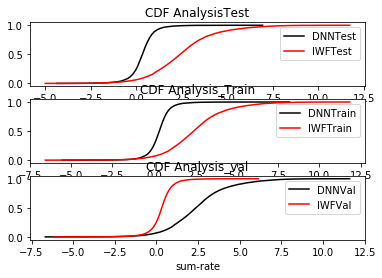

In [308]:
def CDF_Plot(sumRate1, sumRate2, label1= 'DNN', label2= 'IWF'):
    a = np.array(sumRate1) # your array of numbers
    num_bins1 = np.linspace(0, max(sumRate1), 50)
    counts1, bin_edges1 = np.histogram(a, bins='auto', normed=True)
    cdf1 = np.cumsum(counts1*np.diff(bin_edges1))

    b = np.array(sumRate2) # your array of numbers
    num_bins2 = np.linspace(0, max(sumRate2), 50)
    counts2, bin_edges2 = np.histogram(b, bins='auto', normed=True)
    cdf2 = np.cumsum(counts2*np.diff(bin_edges2))

#     plt.figure(1)
#     plt.subplot(221)
#     plt.title('CDF Analysis')
    # plt.xlim([0, 6])
    plt.xlabel('sum-rate')
    plt.plot(bin_edges1[1:], cdf1, color='black', label=label1)
    plt.plot(bin_edges2[1:],cdf2,color='red', label=label2)
    plt.legend()
    return 0
plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')

plt.subplot(313)
plt.title('CDF Analysis_val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNVal', 'IWFVal')


NameError: name 'nnsumRate' is not defined

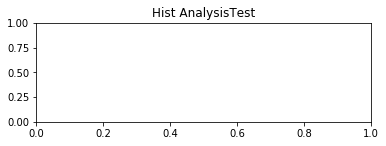

In [2]:
def histPlot(sumRate1,sumRate2, label=['DNN', 'IWF']):
#     plt.figure('%d'%K)
    plt.style.use('seaborn-deep')
    data = np.vstack([sumRate1, sumRate2]).T
    bins = np.linspace(0, max(sumRate2),50)
    plt.hist(data, bins, alpha=0.7, label=label)
#     plt.legend(loc='upper right')
    plt.xlim([0, 5])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    #     plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.show()
    return 0
plt.figure(2)
plt.subplot(211)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(212)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])


In [314]:
def performance(sumRate1,sumRate2, num):
# sumRate1, IWF; sumRate2, NN
    print('Sum-rate: IWF: %0.3f, DNN: %0.3f'%(sum(sumRate1)/num, sum(sumRate2)/num))
    print('Ratio: DNN: %0.3f%%\n' % (sum(sumRate2) / sum(sumRate1)* 100))
    return 0
performance(IWFsumRate, nnsumRate, 10000)
performance(IWFSRTrain, nnSRTrain, 35000)

Sum-rate: IWF: 2.525, DNN: 0.324
Ratio: DNN: 12.818%

Sum-rate: IWF: 2.524, DNN: 0.326
Ratio: DNN: 12.923%



0

In [132]:
def testPerformance(X, model_location, save_name, n_input, n_output, n_hidden_1 = 200, n_hidden_2 = 80, n_hidden_3 = 80, binary=0):
    tf.reset_default_graph()
    x = tf.placeholder("float", [None, n_input])
    is_train = tf.placeholder("bool")
    input_keep_prob = tf.placeholder(tf.float32)
    hidden_keep_prob = tf.placeholder(tf.float32)
    weights, biases = ini_weights(n_input, n_hidden_1, n_hidden_2, n_hidden_3, n_output)
    pred = multilayer_perceptron(x, weights, biases, input_keep_prob, hidden_keep_prob)
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, model_location)
        start_time = time.time()
        y_pred = sess.run(pred, feed_dict={x: X, input_keep_prob: 1, hidden_keep_prob: 1, is_train: False})
        testtime = time.time() - start_time
        # print("testing time: %0.2f s" % testtime)
        if binary==1:
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
        sio.savemat(save_name, {'pred': y_pred})
    return testtime



def obj_sum_rate(x_test, y_prey,M,N,K, samples):
    # H ： sampels*24
    sum_rate=[]
    for i in range(samples):
        rate_nn=0
        H=tf.reshape(x_test[i,:],[M,N,K])
        pnn=tf.reshape(y_prey[i,:],[M,N,K])      
        for j in range(K):
            if j==i:
                rate_nn = rate_nn+tf.real(np.log2(np.linalg.det(np.eye(M)+H[:,:,j] * pnn[:,:,j] * np.transpose(H[:,:,j]))))
            else:
                p_nn[:,:,index]=p_nn[:,:,index]+p_nn[:,:,index-1]
                rate_nn = rate_nn+tf.real(np.log2(np.linalg.det(np.eye(M)+H[:,:,j] * pnn[:,:,j] * np.transpose(H[:,:,j]))))/np.linalg.det((np.eye(M)+H[:,:,j] * pnn[:,:,j-1] * np.transpose(H[:,:,j])))
        sum_rate.append(rate_nn)
    return sum_rate


def WMMSE_sum_rate(p_int, H, Pmax, var_noise):
    K = np.size(p_int)
    vnew = 0
    b = np.sqrt(p_int)
    f = np.zeros(K)
    w = np.zeros(K)
    for i in range(K):
        # print(np.square(H[i, :]),np.square(b))
        f[i] = H[i, i] * b[i] / (sum(np.square(H[i, :]) * np.square(b)) + var_noise)
        w[i] = 1 / (1 - f[i] * b[i] * H[i, i])
        vnew = vnew + math.log2(w[i])

    VV = np.zeros(100)
    for iter in range(100):
        vold = vnew
        for i in range(K):
            btmp = w[i] * f[i] * H[i, i] / sum(w * np.square(f) * np.square(H[:, i]))
            b[i] = min(btmp, np.sqrt(Pmax)) + max(btmp, 0) - btmp

        vnew = 0
        for i in range(K):
            f[i] = H[i, i] * b[i] / (sum(np.square(H[i, :]) * np.square(b)) + var_noise)
            w[i] = 1 / (1 - f[i] * b[i] * H[i, i])
            vnew = vnew + math.log2(w[i])

        VV[iter] = vnew
        if vnew - vold <= 1e-3:
            break

    p_opt = np.square(b)
    return p_opt

# Functions for performance evaluation
def perf_eval(H, Py_p, NN_p, K, var_noise=1):
    num_sample = H.shape[2]
    pyrate = np.zeros(num_sample)
    nnrate = np.zeros(num_sample)
    mprate = np.zeros(num_sample)
    rdrate = np.zeros(num_sample)
    for i in range(num_sample):
        pyrate[i] = obj_IA_sum_rate(H[:, :, i], Py_p[:, i], var_noise, K)
        nnrate[i] = obj_IA_sum_rate(H[:, :, i], NN_p[i, :], var_noise, K)
        mprate[i] = obj_IA_sum_rate(H[:, :, i], np.ones(K), var_noise, K)
        rdrate[i] = obj_IA_sum_rate(H[:, :, i], np.random.rand(K,1), var_noise, K)
    print('Sum-rate: WMMSE: %0.3f, DNN: %0.3f, Max Power: %0.3f, Random Power: %0.3f'%(sum(pyrate)/num_sample, sum(nnrate)/num_sample, sum(mprate)/num_sample, sum(rdrate)/num_sample))
    print('Ratio: DNN: %0.3f%%, Max Power: %0.3f%%, Random Power: %0.3f%%\n' % (sum(nnrate) / sum(pyrate)* 100, sum(mprate) / sum(pyrate) * 100, sum(rdrate) / sum(pyrate) * 100))

    plt.figure('%d'%K)
    plt.style.use('seaborn-deep')
    data = np.vstack([pyrate, nnrate]).T
    bins = np.linspace(0, max(pyrate), 50)
    plt.hist(data, bins, alpha=0.7, label=['WMMSE', 'DNN'])
    plt.legend(loc='upper right')
    plt.xlim([0, 8])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.show()
    return 0
